<a href="https://colab.research.google.com/github/hagmllc/CNN-Animal-Identification/blob/master/nhandangdongvat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#!unzip -q "/content/drive/MyDrive/ltnd/raw-img.zip"
#import shutil
#shutil.unpack_archive("/content/drive/MyDrive/ltnd/archive.zip", "/content/drive/MyDrive/ltnd")


In [ ]:
import numpy as np
import matplotlib.pylab as plt
import os
import cv2
import random

In [ ]:
classes = ["cane", "cavallo", "elefante", "farfalla", "gallina", "gatto", "mucca", "pecora", "ragno"]

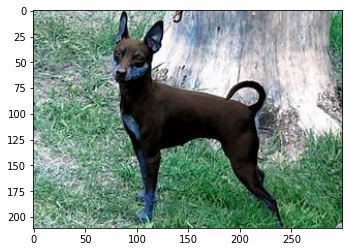

In [ ]:
datadir = '/content/drive/MyDrive/ltnd/raw-img'

for cl in classes:
    path = os.path.join(datadir, cl)
    for im_path in os.listdir(path):
        img = cv2.imread(os.path.join(path, im_path))
        plt.imshow(img)
        break
    break

In [ ]:
img.shape

(211, 300, 3)

In [ ]:
dataset = []
def create_dataset():
    for cl in classes:
        cls_num = classes.index(cl)
        path = os.path.join(datadir, cl)
        for img in os.listdir(path):
            try:
                img = cv2.imread(os.path.join(path, img))
                resized_img = cv2.resize(img, (50,50))
                dataset.append([resized_img, cls_num])
            except Exception as e:
                pass

In [ ]:
create_dataset()

In [ ]:
len(dataset)

19602

In [ ]:
random.shuffle(dataset)
for i in dataset[:10]:
    print(classes[i[1]])

gatto
elefante
cane
farfalla
gatto
cane
pecora
elefante
gallina
cavallo


In [ ]:
x =  []
y = []
for pic, label in dataset:
    x.append(pic)
    y.append(label)

In [ ]:
x = np.array(x).reshape(-1, 50, 50, 3)

In [ ]:
y = np.array(y)

In [ ]:
print(type(x),x.shape)
print(type(y),y.shape)

<class 'numpy.ndarray'> (19602, 50, 50, 3)
<class 'numpy.ndarray'> (19602,)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, Dropout, Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.constraints import max_norm
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2) #chia 80% cho train, 20% cho test

In [ ]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(15681, 50, 50, 3) (3921, 50, 50, 3) (15681,) (3921,)


In [ ]:
classes2 = translate = ["dog", "horse", "elephant", "butterfly", "chicken", "cat", "cow", "sheep", "spider"]

In [ ]:
def img_show(pic, label, index):
    plt.figure(figsize=(15,2))
    plt.imshow(pic[index])
    plt.xlabel(classes2[label[index]], fontsize=15)

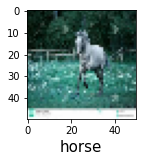

In [ ]:
img_show(x_test, y_test, 10)

In [ ]:
model = Sequential([
    Conv2D(filters=50, kernel_size=(3, 3), activation='relu', input_shape=(50, 50, 3)),
    Dropout(0.2),
    BatchNormalization(),
    
    Conv2D(filters=100, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    BatchNormalization(),
    
    Conv2D(filters=100, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    BatchNormalization(),
    
    Conv2D(filters=200, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    BatchNormalization(),
    
    Flatten(),
    Dropout(0.2),
    
    Dense(256, kernel_constraint=max_norm(3), activation='relu'),
    Dropout(0.2),
    BatchNormalization(),
    
    Dense(128, kernel_constraint=max_norm(3), activation='relu'),
    Dropout(0.2),
    BatchNormalization(),
    
    Dense(10, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#training
#History = model.fit_generator(model.(x_train,y_train, batch_size=128), epochs = epochs, validation_data = (x_test,y_test), verbose = 1, steps_per_epoch=x_train.shape[0] // 128)
history = model.fit(x_train, y_train, epochs=200, batch_size=30, validation_data = (x_test,y_test))

Epoch 1/200
523/523 [==============================] - 34s 37ms/step - loss: 1.8539 - accuracy: 0.3728 - val_loss: 1.9270 - val_accuracy: 0.3272
Epoch 2/200
523/523 [==============================] - 19s 35ms/step - loss: 1.3700 - accuracy: 0.5202 - val_loss: 1.1972 - val_accuracy: 0.5820
Epoch 3/200
523/523 [==============================] - 19s 36ms/step - loss: 1.1781 - accuracy: 0.5877 - val_loss: 1.1282 - val_accuracy: 0.6011
Epoch 4/200
523/523 [==============================] - 19s 35ms/step - loss: 1.0768 - accuracy: 0.6218 - val_loss: 1.3659 - val_accuracy: 0.5499
Epoch 5/200
523/523 [==============================] - 19s 36ms/step - loss: 0.9800 - accuracy: 0.6656 - val_loss: 1.1946 - val_accuracy: 0.6057
Epoch 6/200
523/523 [==============================] - 19s 36ms/step - loss: 0.9108 - accuracy: 0.6817 - val_loss: 1.0612 - val_accuracy: 0.6396
Epoch 7/200
523/523 [==============================] - 19s 36ms/step - loss: 0.8349 - accuracy: 0.7081 - val_loss: 0.9682 - val_ac

In [ ]:
model.evaluate(x_test, y_test)

123/123 [==============================] - 2s 13ms/step - loss: 0.8362 - accuracy: 0.7916


[0.8362147212028503, 0.7916347980499268]

In [ ]:
r = model.predict(x_test)

In [ ]:
print(r[2])

[6.7466408e-01 4.8923912e-04 1.7232950e-01 6.9491516e-17 1.8389453e-07
 2.2446782e-04 4.7774185e-05 1.5224473e-01 6.2952559e-09 7.6337742e-11]


In [ ]:
print(np.argmax(r[2]))

0


In [ ]:
classes2[np.argmax(r[2])]

'dog'

In [ ]:
for i in r[:10]:
    print(classes2[np.argmax(i)])

chicken
horse
dog
dog
chicken
cow
sheep
butterfly
spider
chicken


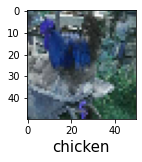

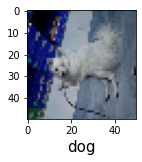

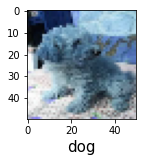

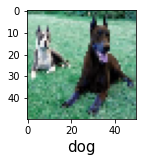

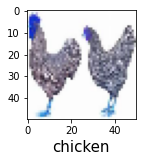

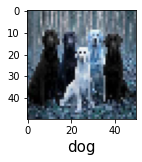

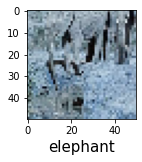

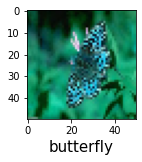

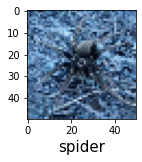

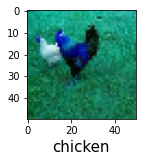

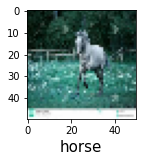

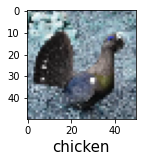

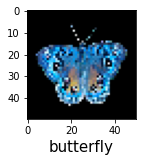

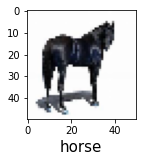

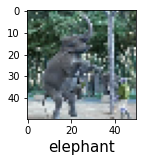

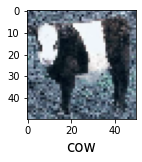

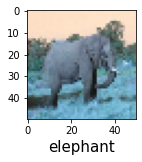

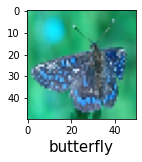

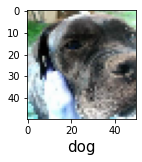

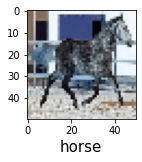

In [ ]:
for i in range(20):
    img_show(x_test, y_test, i)

In [ ]:
score = model.evaluate(x_test, y_test, verbose=1)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

123/123 [==============================] - 1s 11ms/step - loss: 0.8362 - accuracy: 0.7916
Test loss: 0.8362147212028503
Test accuracy: 0.7916347980499268


In [ ]:
model.save_weights("model.h5")
#loaded_model.load_weights("model_vgg16.h5"

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


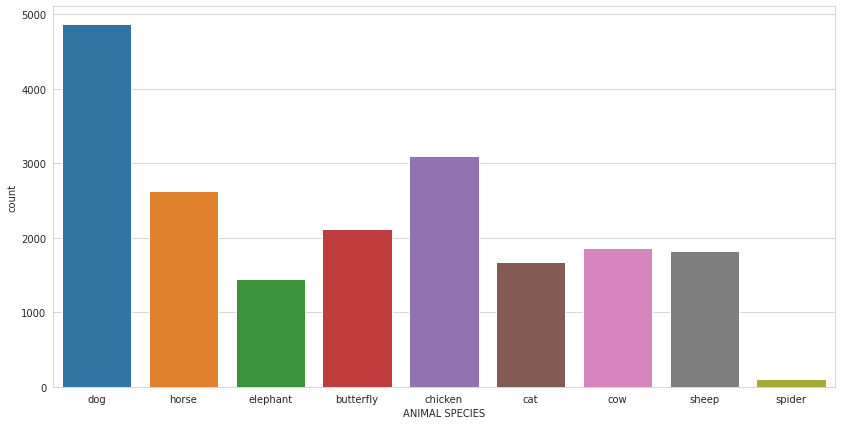

In [ ]:
import seaborn as sns
sns.set_style('whitegrid')
plt.figure(figsize=(14,7))
fig=sns.countplot(y)
fig.set(xticks=range(len(classes2)), xticklabels=[i for i in classes2])
plt.xlabel('ANIMAL SPECIES')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from sklearn import metrics

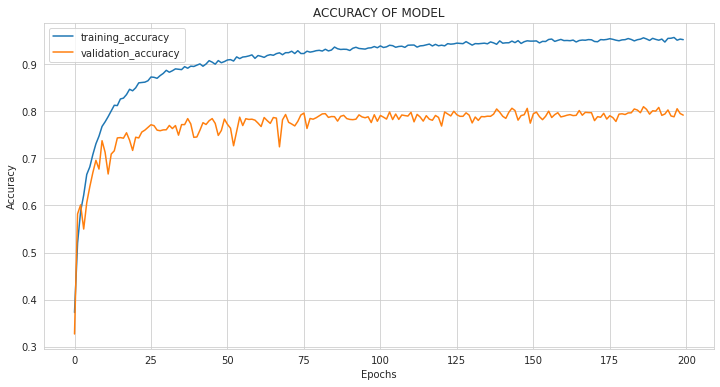

In [ ]:
# accuracy of our model
plt.figure(figsize=(12, 6))
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("ACCURACY OF MODEL")
plt.legend(['training_accuracy', 'validation_accuracy'])
plt.show()

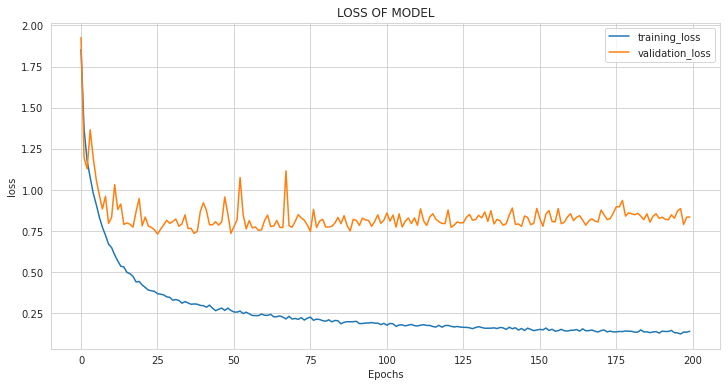

In [ ]:
# loss of our model
plt.figure(figsize=(12, 6))
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.title("LOSS OF MODEL")
plt.legend(['training_loss', 'validation_loss'])
plt.show()